# Python / Bond Calculus integration

In [1]:
latex.add_to_preamble(r"\usepackage{amsmath}")
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [2]:
from ulbc.bondcalculus import *

In [3]:
m = BondModel("models/enzymeI.biocpi"); m

Running cmd: 'load "models/enzymeI.biocpi"' ...


In [4]:
p = BondProcess("Pi || [0.5 .. 0.6] E", m); p

BondProcess('Pi || [0.5 .. 0.6] E', <ulbc.bondcalculus.BondModel object at 0x7fcbe5524f60>)

In [5]:
s = p.as_system; s

Running cmd: 'savesage "Pi || [0.5 .. 0.6] E" "/tmp/bond-script-5950011.py"' ...


System(R, (x0, x1, x2, x3), [1, 0, [0.59999999999999997 .. 0.70000000000000007], 0], (-1.1?*x0*x2, 0.50000000000000000?*x3, -1.1?*x0*x2 + 0.50000000000000000?*x3, 1.1?*x0*x2 - 0.50000000000000000?*x3), varmap={'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3})

In [6]:
r = s.reach(4); r.successful

run = True
vars = ['x0', 'x1', 'x2', 'x3']
var = x0 type(var) = <class 'str'> var_str = x0
var = x1 type(var) = <class 'str'> var_str = x1
var = x2 type(var) = <class 'str'> var_str = x2
var = x3 type(var) = <class 'str'> var_str = x3


True

/usr/lib64/python3.7/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


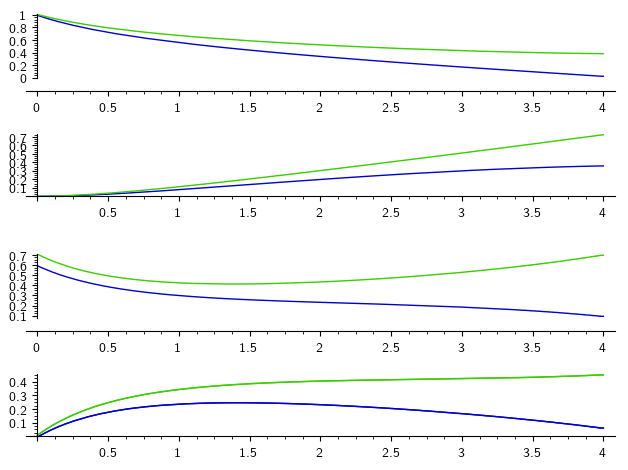

In [7]:
with suppress_stdout():
    res = graphics_array([r.sage_plot(x) for x in s.x], len(s.x), 1)
res

In [18]:
s.varmap

{'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3}

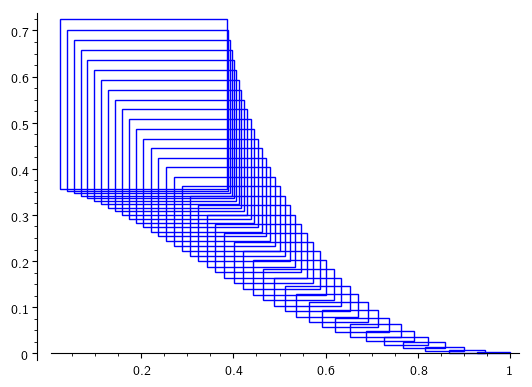

In [8]:
with suppress_stdout():
    res = r.sage_interval_plot('x0', 'x1')
res

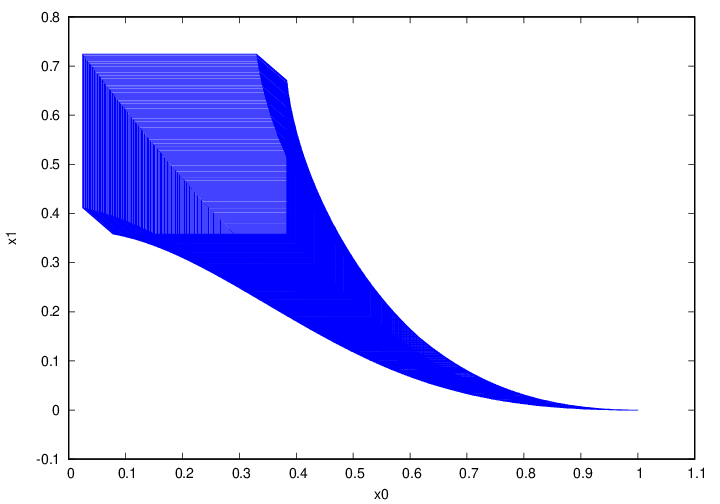

In [9]:
r.wplot(b"x0", b"x1")

In [11]:
from ulbc.logic import *

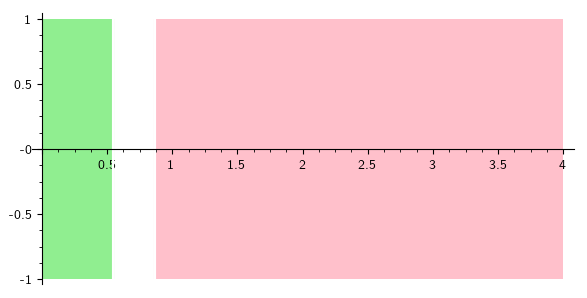

In [12]:
with suppress_stdout(): 
    sig = Atomic(s.v('S') - 0.7).signal_for_system(s, 4)
sig.plot()

In [13]:
s

System(R, (x0, x1, x2, x3), [1, 0, [0.59999999999999997 .. 0.70000000000000007], 0], (-1.1?*x0*x2, 0.50000000000000000?*x3, -1.1?*x0*x2 + 0.50000000000000000?*x3, 1.1?*x0*x2 - 0.50000000000000000?*x3), varmap={'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3})

In [14]:
sigC = G(RIF(0,0.2), "[0 .. 10] E" >> Atomic(var('S') - 0.7)).signal_for_system(s, 4)
sigC

run = True
vars = ['x0', 'x1', 'x2', 'x3']
var = x0 type(var) = <class 'str'> var_str = x0
var = x1 type(var) = <class 'str'> var_str = x1
var = x2 type(var) = <class 'str'> var_str = x2
var = x3 type(var) = <class 'str'> var_str = x3
Computed 96 flowpipes in 14.138206243515015 sec
In G.signal
In C.signal
{'order': 10, 'step': (0.001, 0.1)}
mask = None
in eval
fp.size = 96
fp_compo.size = 96
flowpipesCompo.size = 0
domains.size = 96
in loop
[0.0..4.2010000000000005] overlaps [0.0..0.025]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [0.025..0.03875000000000001]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [0.03875000000000001..0.05387500000000001]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [0.05387500000000001..0.07051250000000003]
do

in loop
[0.0..4.2010000000000005] overlaps [2.2234901484205567..2.2681701410749024]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [2.2681701410749024..2.3173181329946826]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [2.3173181329946826..2.371380924106441]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [2.371380924106441..2.430849994329375]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [2.430849994329375..2.4962659715746023]
doing normal eval
fp_compo->has_value() = False
composing fp
orders = [10, 10, 10, 10]
in loop
[0.0..4.2010000000000005] overlaps [2.4962659715746023..2.5682235465443526]
doing normal eval
fp_compo->has_value() = False
composing fp
orde

fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.10894512500000007..0.1310896375000001]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.1310896375000001..0.15544860125000015]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.15544860125000015..0.1822434613750002]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.1822434613750002..0.21171780751250024]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.21171780751250024..0.24413958826375032]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.24413958826375032..0.2798035470901254]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.2798035470901254..0.2994187244446317]
doing normal eval
fp_compo->has_value() = True
in loop
[0.0..1.0502500000000001] overlaps [0.2

in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.5461673950611988..0.5924189572128126]
doing normal eval
fp_compo->has_value() = True
in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.5924189572128126..0.6178573163962001]
doing normal eval
fp_compo->has_value() = True
in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.6178573163962001..0.6458395114979264]
doing normal eval
fp_compo->has_value() = True
in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.6458395114979264..0.6766199261098254]
doing normal eval
fp_compo->has_value() = True
in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.6766199261098254..0.7104783821829143]
doing normal eval
fp_compo->has_value() = True
in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.7104783821829143..0.747722683863312]
doing normal eval
fp_compo->has_value() = True
in loop
[0.5251250000000001..1.0502500000000001] overlaps [0.747722683863312..0.7886914157117495]
doing normal eval
fp_compo-

fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.1209576002015313..1.1692586635341422]
doing normal eval
fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.1692586635341422..1.222389833200014]
doing normal eval
fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.222389833200014..1.280834119832473]
doing normal eval
fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.280834119832473..1.345122835128178]
doing normal eval
fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.345122835128178..1.380481628540816]
doing normal eval
fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.380481628540816..1.4193763012947176]
doing normal eval
fp_compo->has_value() = True
in loop
[1.0502500000000001..2.1005000000000003] overlaps [1.4193763012947176..1.4621604413240092]
doin

Signal([0.0000000000000000 .. 4.0000000000000000], [([0.0000000000000000 .. 0.32512500000000006], True), ([0.85025000000000017 .. 4.0000000000000000], False)], mask=None)

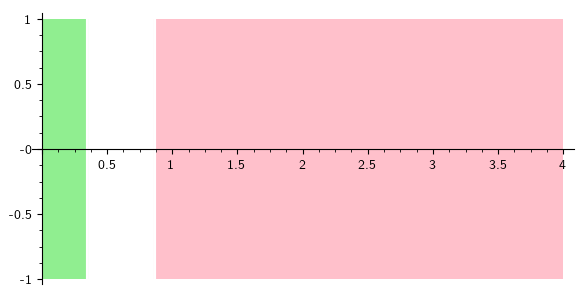

In [15]:
sigC.plot()